<a href="https://colab.research.google.com/github/Amulya-Rao-mj/Machine-learning-lab-/blob/main/RidgeRegression_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 15494126.706597928
Root Mean Squared Error (RMSE): 3936.25795732418
R² Score: 0.8037327395545613


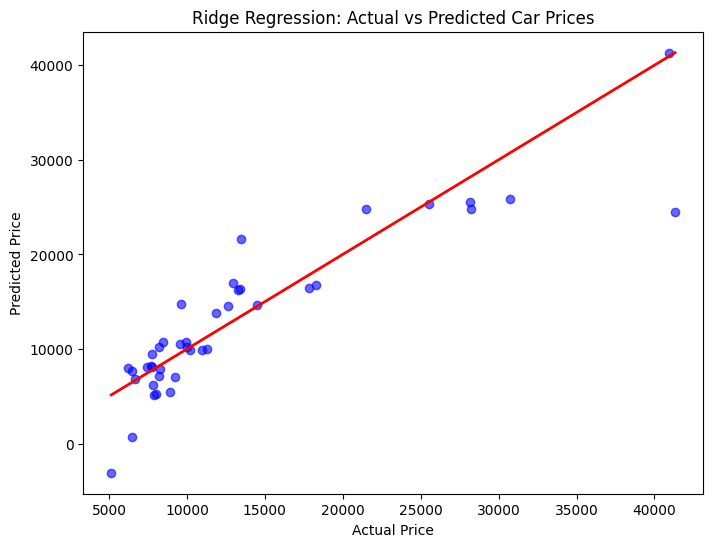

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("CarPrice_Assignment.csv")

# Separate features and target
X = data.drop(["CarName", "car_ID", "price"], axis=1)
y = data["price"]

# Encode categorical columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted Car Prices")
plt.show()



In [5]:
sample = np.random.rand(3, X.shape[1])
sample_df = pd.DataFrame(sample, columns=X.columns)
random_preds = ridge.predict(sample_df)
print("\nRandom Sample Predictions:")
print(random_preds)


Random Sample Predictions:
[-54702.92604101 -53901.45479447 -50488.53024735]


In [6]:
# --- Random Sample Predictions ---

random_indices = np.random.choice(X_test.index, 3, replace=False)
sample_data = X_test.loc[random_indices]
sample_true = y_test.loc[random_indices]
sample_pred = ridge.predict(sample_data)
print("\nRandom Sample Predictions:")
for i in range(len(sample_data)):
    print(f"Car {i+1}:")
    print(f"  Actual Price   = {sample_true.iloc[i]:.2f}")
    print(f"  Predicted Price = {sample_pred[i]:.2f}\n")



Random Sample Predictions:
Car 1:
  Actual Price   = 7898.00
  Predicted Price = 5089.33

Car 2:
  Actual Price   = 7775.00
  Predicted Price = 8081.17

Car 3:
  Actual Price   = 10198.00
  Predicted Price = 9883.67

